In [1]:
!pip install wget
!pip install py7zr

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=16ed62cf3103faf827e3ddc472474e2f8def2e01ace74ef902b254b053c54b38
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 35.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.9/138.9 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.8/413.8 kB 30.8 MB/s eta 0:00:00


In [2]:
!pip install tensorflow
!pip install kymatio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 18.1 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: keras
    Found existing installation: keras 3.3.3
    Uninstalling keras-3.3.3:
      Successfully uninstalled keras-3.3.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.8.1 requires wurlitzer, which is not installed.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.6/87.6 kB 2.9 MB/s eta 0:00:00


In [3]:
import torch
from torch.utils.data import TensorDataset, DataLoader
import torch.nn
import torch.nn.functional
import torch.optim
from torchvision import models #just for debugging

In [4]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
from tqdm import tqdm
import scipy.io
from scipy.optimize import brentq
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

from scipy.ndimage.filters import gaussian_filter

import random
import numpy as np
import tensorflow as tf
from tensorflow import keras
import sys
from tensorflow.keras import layers, models , optimizers , losses ,activations , callbacks, metrics
# import matplotlib.pyplot as plt
import PIL.Image
import cv2
import os
import pathlib
from tqdm import tqdm

from sklearn import metrics as sklearn_metrics
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import vgg16

from kymatio.keras import Scattering2D

/tmp/ipykernel_34/1570290423.py:12: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter
2024-07-09 18:54:56.652812: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-09 18:54:56.652929: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-09 18:54:56.780509: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [5]:
import py7zr
from zipfile import ZipFile
from random import sample
import PIL.Image as Image
import matplotlib.pyplot as plt
from  sklearn.model_selection import train_test_split
from os import listdir
from os import path
import h5py
import numpy as np
import wget

In [6]:
from sklearn.model_selection import train_test_split

In [ ]:
import numpy as np
import cv2
from scipy.ndimage import gaussian_filter
from PIL import Image
import matplotlib.pyplot as plt

def generate_vertical_curves(dim_x, pixels_x, num_strands, a, b, c, d, e, f):
    num_coeffs = 6
    coeffs_vec = np.zeros((num_coeffs, num_strands))

    a_vec = np.random.uniform(a[0], a[1], num_strands)
    b_vec = np.random.uniform(b[0], b[1], num_strands)
    c_vec = np.random.uniform(c[0], c[1], num_strands)
    d_vec = np.random.uniform(d[0], d[1], num_strands)
    e_vec = np.random.uniform(e[0], e[1], num_strands)
    f_vec = np.random.uniform(f[0], f[1], num_strands)

    coeffs_vec[num_coeffs - 1 - 0, :] = a_vec
    coeffs_vec[num_coeffs - 1 - 1, :] = b_vec
    coeffs_vec[num_coeffs - 1 - 2, :] = c_vec
    coeffs_vec[num_coeffs - 1 - 3, :] = d_vec
    coeffs_vec[num_coeffs - 1 - 4, :] = e_vec
    coeffs_vec[num_coeffs - 1 - 5, :] = f_vec

    x_vals = np.linspace(0, dim_x, pixels_x)
    x_vec = np.ones((pixels_x, num_coeffs))

    for p in range(1, num_coeffs):
        x_vec[:, p] = np.power(x_vals, p)

    mat = np.matmul(x_vec, coeffs_vec)

    return mat

def add_vertical_hair_occlusion(img_orig, side='left'):
    dim_y, dim_x = img_orig.shape
    pixels_x = 1000
    pixels_y = int(np.ceil((dim_y / dim_x) * pixels_x))
    num_strands = 20000  # Increase the number of strands for more visible hair

    x = np.linspace(0, dim_x, pixels_x)
    curves = generate_vertical_curves(dim_x, pixels_x, num_strands, [0, 0], [0, 0], [-0.005, 0.005], [-0.01, 0.01], [-0.5, 0.15], [-0.5, 0.5])

    curves_floor = np.floor(curves * (pixels_y / dim_y)).astype(int)
    curves_ceil = np.ceil(curves * (pixels_y / dim_y)).astype(int)

    img = np.zeros((pixels_y, pixels_x))
    for i in range(pixels_x):
        this_col = curves_ceil[i, :]
        sel_vec = this_col[np.logical_and(this_col > 0, this_col < pixels_y)]
        
        sel_vec_clip = np.clip(sel_vec, 0, pixels_y - 1)
        img[sel_vec_clip, i] = img[sel_vec_clip, i] + 1
        img[np.clip(sel_vec_clip - 1, 0, pixels_y - 1), i] = img[np.clip(sel_vec_clip - 1, 0, pixels_y - 1), i] + 1
        img[np.clip(sel_vec_clip + 1, 0, pixels_y - 1), i] = img[np.clip(sel_vec_clip + 1, 0, pixels_y - 1), i] + 1

    img = cv2.resize(img, dsize=(dim_x, dim_y), interpolation=cv2.INTER_CUBIC)
    img_gt = img / np.max(img)
    img_gt = img_gt.astype('float32')

    if side == 'left':
        img_gt = np.fliplr(img_gt)

    sig = np.random.uniform(0.3, 0.5)  # Increase Gaussian blur for more visible hair
    
    hair_color = np.random.uniform(0.2, 0.4)  # Darker hair color

    img_gauss = np.multiply(img_orig, (np.ones(img_gt.shape) - gaussian_filter(img_gt, sig))) + hair_color * gaussian_filter(img_gt, sig)

    return img_gauss

# Example usage:
# Load a grayscale image
image_path = '/kaggle/input/iitb-ear/Archishman IITB Ear Data/001_02.jpg'  # Replace with your image path
original_image = np.array(Image.open(image_path).convert('L'))

# Add vertical hair occlusion to the image starting from the leftmost side
hair_occluded_image = add_vertical_hair_occlusion(original_image, side='right')

# Visualize the original and hair-occluded images
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(hair_occluded_image, cmap='gray')
plt.title('Vertical Hair Occluded Image')
plt.axis('off')

plt.tight_layout()
plt.show()

In [8]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
import random
import cv2
from scipy.ndimage import gaussian_filter
import torch

# Update src_dir to point to your data folder
src_dir = '/kaggle/input/iitb-ear/Archishman IITB Ear Data'

images_name = os.listdir(src_dir)
images_name_temp = []
subjects = []

for img_ind in range(len(images_name)):
    if images_name[img_ind] != 'Thumbs.db':
        subject_str = images_name[img_ind].split('_')[0]
        if subject_str.isdigit():
            subjects.append(int(subject_str))
            images_name_temp.append(images_name[img_ind])
        else:
            print(f"Skipping file {images_name[img_ind]} as it does not start with a subject number.")

images_name = images_name_temp
images_name_ord = []
subjects_ord = []

sub_ind = sorted(range(len(subjects)), key=subjects.__getitem__)
for pos, item in enumerate(sub_ind):
    images_name_ord.append(images_name[item])
    subjects_ord.append(subjects[item])

images_name = images_name_ord
subjects = subjects_ord

print(subjects)
print(images_name)

target_size = (50, 180)

def generate_vertical_curves(dim_x, pixels_x, num_strands, a, b, c, d, e, f):
    num_coeffs = 6
    coeffs_vec = np.zeros((num_coeffs, num_strands))

    a_vec = np.random.uniform(a[0], a[1], num_strands)
    b_vec = np.random.uniform(b[0], b[1], num_strands)
    c_vec = np.random.uniform(c[0], c[1], num_strands)
    d_vec = np.random.uniform(d[0], d[1], num_strands)
    e_vec = np.random.uniform(e[0], e[1], num_strands)
    f_vec = np.random.uniform(f[0], f[1], num_strands)

    coeffs_vec[num_coeffs - 1 - 0, :] = a_vec
    coeffs_vec[num_coeffs - 1 - 1, :] = b_vec
    coeffs_vec[num_coeffs - 1 - 2, :] = c_vec
    coeffs_vec[num_coeffs - 1 - 3, :] = d_vec
    coeffs_vec[num_coeffs - 1 - 4, :] = e_vec
    coeffs_vec[num_coeffs - 1 - 5, :] = f_vec

    x_vals = np.linspace(0, dim_x, pixels_x)
    x_vec = np.ones((pixels_x, num_coeffs))

    for p in range(1, num_coeffs):
        x_vec[:, p] = np.power(x_vals, p)

    mat = np.matmul(x_vec, coeffs_vec)

    return mat

def add_vertical_hair_occlusion(img_orig, side='left'):
    dim_y, dim_x = img_orig.shape
    pixels_x = 1000
    pixels_y = int(np.ceil((dim_y / dim_x) * pixels_x))
    num_strands = 20000  # Increase the number of strands for more visible hair

    x = np.linspace(0, dim_x, pixels_x)
    curves = generate_vertical_curves(dim_x, pixels_x, num_strands, [0, 0], [0, 0], [-0.005, 0.005], [-0.01, 0.01], [-0.5, 0.15], [-0.5, 0.5])

    curves_floor = np.floor(curves * (pixels_y / dim_y)).astype(int)
    curves_ceil = np.ceil(curves * (pixels_y / dim_y)).astype(int)

    img = np.zeros((pixels_y, pixels_x))
    for i in range(pixels_x):
        this_col = curves_ceil[i, :]
        sel_vec = this_col[np.logical_and(this_col > 0, this_col < pixels_y)]
        
        sel_vec_clip = np.clip(sel_vec, 0, pixels_y - 1)
        img[sel_vec_clip, i] = img[sel_vec_clip, i] + 1
        img[np.clip(sel_vec_clip - 1, 0, pixels_y - 1), i] = img[np.clip(sel_vec_clip - 1, 0, pixels_y - 1), i] + 1
        img[np.clip(sel_vec_clip + 1, 0, pixels_y - 1), i] = img[np.clip(sel_vec_clip + 1, 0, pixels_y - 1), i] + 1

    img = cv2.resize(img, dsize=(dim_x, dim_y), interpolation=cv2.INTER_CUBIC)
    img_gt = img / np.max(img)
    img_gt = img_gt.astype('float32')

    if side == 'left':
        img_gt = np.fliplr(img_gt)

    sig = np.random.uniform(0.3, 0.5)  # Increase Gaussian blur for more visible hair
    
    hair_color = np.random.uniform(0.2, 0.4)  # Darker hair color

    img_gauss = np.multiply(img_orig, (np.ones(img_gt.shape) - gaussian_filter(img_gt, sig))) + hair_color * gaussian_filter(img_gt, sig)

    return img_gauss

def process_image(img_path, target_size):
    ear_img = Image.open(img_path).convert('L')
    ear_img = ear_img.resize(target_size, Image.ANTIALIAS)
    ear_img = np.asarray(ear_img).astype(np.float32) / 255
    ear_img = np.expand_dims(ear_img, axis=0)  # Add channel dimension
    return ear_img

def augment_image(image, target_size):
    augmented_images = []
    pil_img = Image.fromarray((image.squeeze() * 255).astype(np.uint8), mode='L')

    augmented_images.append(image.astype(np.float32))

    rotated_img = pil_img.rotate(random.uniform(-10, 10), resample=Image.BICUBIC)
    rotated_img = rotated_img.resize(target_size, Image.ANTIALIAS)
    rotated_img = np.asarray(rotated_img).astype(np.float32) / 255
    rotated_img = np.expand_dims(rotated_img, axis=0)
    augmented_images.append(rotated_img.astype(np.float32))

    scale_factor = random.uniform(0.8, 1.2)
    scaled_img = pil_img.resize((int(target_size[0] * scale_factor), int(target_size[1] * scale_factor)), Image.ANTIALIAS)
    scaled_img = scaled_img.resize(target_size, Image.ANTIALIAS)
    scaled_img = np.asarray(scaled_img).astype(np.float32) / 255
    scaled_img = np.expand_dims(scaled_img, axis=0)
    augmented_images.append(scaled_img.astype(np.float32))

    max_translate = 10
    translate_x = random.randint(-max_translate, max_translate)
    translate_y = random.randint(-max_translate, max_translate)
    translation_matrix = (1, 0, translate_x, 0, 1, translate_y)
    translated_img = pil_img.transform(pil_img.size, Image.AFFINE, translation_matrix)
    translated_img = translated_img.resize(target_size, Image.ANTIALIAS)
    translated_img = np.asarray(translated_img).astype(np.float32) / 255
    translated_img = np.expand_dims(translated_img, axis=0)
    augmented_images.append(translated_img.astype(np.float32))

    noisy_img = image.copy()
    noise = np.random.normal(0, 0.05, noisy_img.shape)
    noisy_img = np.clip(noisy_img + noise, 0, 1)
    augmented_images.append(noisy_img.astype(np.float32))

    bright_img = np.clip(image * random.uniform(0.8, 1.2), 0, 1)
    augmented_images.append(bright_img.astype(np.float32))

    contrast_img = np.clip((image - 0.5) * random.uniform(0.8, 1.2) + 0.5, 0, 1)
    augmented_images.append(contrast_img.astype(np.float32))

    return np.array(augmented_images).astype(np.float32)

ear_images = []
sub_labels = []
all_right_images = []
all_left_images = []
right_labels = []
left_labels = []

for sub_ind in tqdm(range(len(subjects))):
    img_path = os.path.join(src_dir, images_name[sub_ind])
    ear_img = process_image(img_path, target_size)

    image_num = int(images_name[sub_ind].split('_')[1].split('.')[0])

    if image_num in [2, 4, 7, 9]:
        ear_img = add_vertical_hair_occlusion(ear_img.squeeze(), side='left' if image_num in [2, 4] else 'right')
        ear_img = np.expand_dims(ear_img, axis=0)
        
    augmented_imgs = augment_image(ear_img, target_size)

    if len(ear_images) == 0:
        ear_images = augmented_imgs
    else:
        ear_images = np.concatenate((ear_images, augmented_imgs), axis=0)
    
    sub_labels.extend([subjects[sub_ind] - 1] * 7)

    if 1 <= image_num <= 5:
        if len(all_right_images) == 0:
            all_right_images = augmented_imgs
        else:
            all_right_images = np.concatenate((all_right_images, augmented_imgs), axis=0)
        right_labels.extend([subjects[sub_ind] - 1] * 7)
    else:  # 6 <= image_num <= 10
        if len(all_left_images) == 0:
            all_left_images = augmented_imgs
        else:
            all_left_images = np.concatenate((all_left_images, augmented_imgs), axis=0)
        left_labels.extend([subjects[sub_ind] - 1] * 7)

sub_labels = np.array(sub_labels).astype(np.int64)  # Convert labels to int64 (long) for PyTorch
right_labels = np.array(right_labels).astype(np.int64)
left_labels = np.array(left_labels).astype(np.int64)

print("All Ear Images Shape:", ear_images.shape)
print("All Labels Shape:", sub_labels.shape)
print("Right Ear Images Shape:", all_right_images.shape)
print("Right Ear Labels Shape:", right_labels.shape)
print("Left Ear Images Shape:", all_left_images.shape)
print("Left Ear Labels Shape:", left_labels.shape)

# Convert to PyTorch tensors
ear_images = torch.tensor(ear_images).float()
all_right_images = torch.tensor(all_right_images).float()
all_left_images = torch.tensor(all_left_images).float()
sub_labels = torch.tensor(sub_labels).long()
right_labels = torch.tensor(right_labels).long()
left_labels = torch.tensor(left_labels).long()

print("Ear Images Tensor Shape:", ear_images.shape)
print("Right Ear Images Tensor Shape:", all_right_images.shape)
print("Left Ear Images Tensor Shape:", all_left_images.shape)
print("Labels Tensor Type:", sub_labels.dtype)
print("Right Labels Tensor Type:", right_labels.dtype)
print("Left Labels Tensor Type:", left_labels.dtype)


[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 28, 28, 2

  0%|          | 0/1000 [00:00<?, ?it/s]/tmp/ipykernel_34/733752131.py:111: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  ear_img = ear_img.resize(target_size, Image.ANTIALIAS)
/tmp/ipykernel_34/733752131.py:123: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  rotated_img = rotated_img.resize(target_size, Image.ANTIALIAS)
/tmp/ipykernel_34/733752131.py:129: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  scaled_img = pil_img.resize((int(target_size[0] * scale_factor), int(target_size[1] * scale_factor)), Image.ANTIALIAS)
/tmp/ipykernel_34/733752131.py:130: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  scaled_img = scaled_img.resize(targ

All Ear Images Shape: (7000, 1, 180, 50)
All Labels Shape: (7000,)
Right Ear Images Shape: (3500, 1, 180, 50)
Right Ear Labels Shape: (3500,)
Left Ear Images Shape: (3500, 1, 180, 50)
Left Ear Labels Shape: (3500,)
Ear Images Tensor Shape: torch.Size([7000, 1, 180, 50])
Right Ear Images Tensor Shape: torch.Size([3500, 1, 180, 50])
Left Ear Images Tensor Shape: torch.Size([3500, 1, 180, 50])
Labels Tensor Type: torch.int64
Right Labels Tensor Type: torch.int64
Left Labels Tensor Type: torch.int64


ear_images shape: torch.Size([7000, 1, 180, 50])
sub_labels shape: torch.Size([7000])


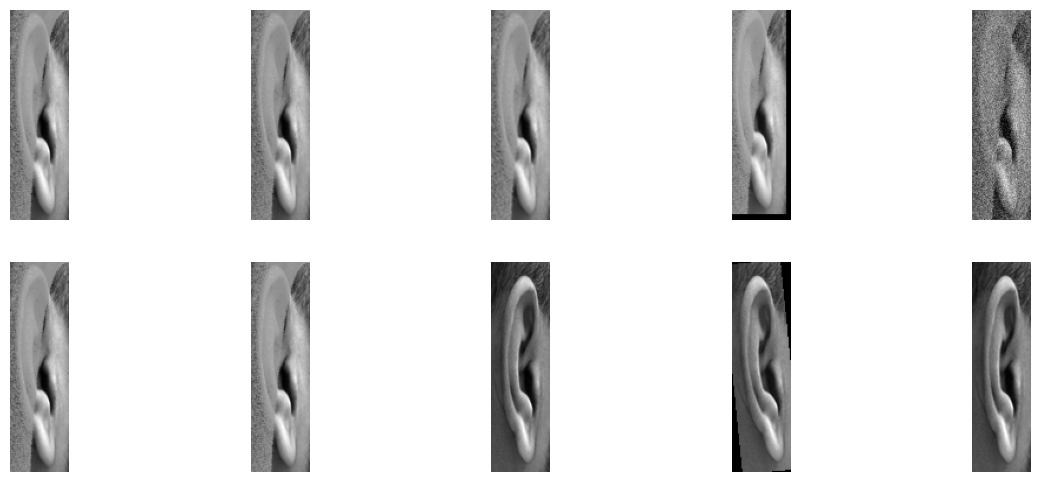

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to visualize images in a grid
def visualize_images(images, labels, num_images=10, grid_size=(2, 5)):
    plt.figure(figsize=(15,6))
    for i in range(num_images):
        plt.subplot(grid_size[0], grid_size[1], i+1)
        plt.imshow(images[i, 0], cmap='gray')  # Assuming images are grayscale
        
        plt.axis('off')
    plt.show()

# Assuming ear_images and sub_labels are already defined as numpy arrays
print(f'ear_images shape: {ear_images.shape}')
print(f'sub_labels shape: {sub_labels.shape}')

# Visualize the first 10 images
visualize_images(ear_images, sub_labels, num_images=10, grid_size=(2, 5))

In [10]:
# import torch
# import torch.nn as nn
# import torch.optim as optim
# from torch.utils.data import DataLoader, Dataset, random_split
# from sklearn.metrics import accuracy_score



# # Define datasets and dataloaders for left, right, and combined images
# class EarDataset(Dataset):
#     def __init__(self, images, labels):
#         self.images = images
#         self.labels = labels

#     def __len__(self):
#         return len(self.images)

#     def __getitem__(self, idx):
#         return self.images[idx], self.labels[idx]

# # Split datasets into training, validation, and testing
# def split_dataset(dataset, split_ratio=(0.8, 0.1, 0.1)):
#     assert sum(split_ratio) == 1.0, "Split ratio must sum to 1"
#     total_size = len(dataset)
#     train_size = int(split_ratio[0] * total_size)
#     val_size = int(split_ratio[1] * total_size)
#     test_size = total_size - train_size - val_size
#     train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])
#     return train_dataset, val_dataset, test_dataset



# # Assuming you have separate datasets for left, right, and combined images
# left_dataset = EarDataset(all_left_images, left_labels)
# right_dataset = EarDataset(all_right_images, right_labels)
# combined_dataset = EarDataset(ear_images, sub_labels)

# # Split datasets into training, validation, and testing
# train_left_dataset, val_left_dataset,test_dataset_left  = split_dataset(left_dataset)
# train_right_dataset, val_right_dataset, test_dataset_right = split_dataset(right_dataset)
# train_combined_dataset, val_combined_dataset, test_dataset_fused = split_dataset(combined_dataset)

# batch_size = 64
# train_left_dataloader = DataLoader(train_left_dataset, batch_size=batch_size, shuffle=True)
# val_left_dataloader = DataLoader(val_left_dataset, batch_size=batch_size, shuffle=False)
# train_right_dataloader = DataLoader(train_right_dataset, batch_size=batch_size, shuffle=True)
# val_right_dataloader = DataLoader(val_right_dataset, batch_size=batch_size, shuffle=False)
# train_combined_dataloader = DataLoader(train_combined_dataset, batch_size=batch_size, shuffle=True)
# val_combined_dataloader = DataLoader(val_combined_dataset, batch_size=batch_size, shuffle=False)

# test_loader_right = DataLoader(test_dataset_right, batch_size=batch_size, shuffle=False)

# # Define test loaders for left ear data
# test_loader_left = DataLoader(test_dataset_left, batch_size=batch_size, shuffle=False)

# # Define test loaders for fused data
# test_loader_fused = DataLoader(test_dataset_fused, batch_size=batch_size, shuffle=False)


In [11]:
from sklearn.model_selection import train_test_split

def split_data(ear_images, sub_labels, test_size_1=0.382093316519, test_size_2=None, random_state=42):
    
    # First split into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(ear_images, sub_labels, test_size=test_size_1, random_state=random_state, stratify=sub_labels)
    
    print('Training dataset:')
    print(X_train.shape)
    print(y_train.shape)
    print('Test dataset:')
    print(X_test.shape)
    print(y_test.shape)
    
    if test_size_2 is not None:
        # Further split training set into training and validation sets
        X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=test_size_2, random_state=random_state, stratify=y_train)
        
        print('Validation dataset:')
        print(X_valid.shape)
        print(y_valid.shape)
        
        return X_train, X_valid, X_test, y_train, y_valid, y_test
    
    return X_train, X_test, y_train, y_test

# Example usage:
X_train_r, X_valid_r, X_test_r, y_train_r, y_valid_r, y_test_r = split_data(all_right_images, right_labels, test_size_2=0.386363636363)
X_train_l, X_valid_l, X_test_l, y_train_l, y_valid_l, y_test_l = split_data(all_left_images, left_labels, test_size_2=0.386363636363)
X_train_f, X_valid_f, X_test_f, y_train_f, y_valid_f, y_test_f = split_data(ear_images, sub_labels, test_size_2=0.386363636363)


Training dataset:
torch.Size([2162, 1, 180, 50])
torch.Size([2162])
Test dataset:
torch.Size([1338, 1, 180, 50])
torch.Size([1338])
Validation dataset:
torch.Size([836, 1, 180, 50])
torch.Size([836])
Training dataset:
torch.Size([2162, 1, 180, 50])
torch.Size([2162])
Test dataset:
torch.Size([1338, 1, 180, 50])
torch.Size([1338])
Validation dataset:
torch.Size([836, 1, 180, 50])
torch.Size([836])
Training dataset:
torch.Size([4325, 1, 180, 50])
torch.Size([4325])
Test dataset:
torch.Size([2675, 1, 180, 50])
torch.Size([2675])
Validation dataset:
torch.Size([1672, 1, 180, 50])
torch.Size([1672])


In [12]:
batch_size = 64
import torch
from torchvision import transforms
from torch.utils.data import DataLoader, TensorDataset

batch_size = 64
# DataLoader for left ear data
train_left_dataloader = DataLoader(TensorDataset(torch.tensor(X_train_l), torch.tensor(y_train_l)), batch_size=batch_size, shuffle=True)
val_left_dataloader = DataLoader(TensorDataset(torch.tensor(X_valid_l), torch.tensor(y_valid_l)), batch_size=batch_size, shuffle=False)
test_loader_left = DataLoader(TensorDataset(torch.tensor(X_test_l), torch.tensor(y_test_l)), batch_size=batch_size, shuffle=False)

# DataLoader for right ear data
train_right_dataloader = DataLoader(TensorDataset(torch.tensor(X_train_r), torch.tensor(y_train_r)), batch_size=batch_size, shuffle=True)
val_right_dataloader = DataLoader(TensorDataset(torch.tensor(X_valid_r), torch.tensor(y_valid_r)), batch_size=batch_size, shuffle=False)
test_loader_right = DataLoader(TensorDataset(torch.tensor(X_test_r), torch.tensor(y_test_r)), batch_size=batch_size, shuffle=False)

# DataLoader for fused (combined) data
train_combined_dataloader = DataLoader(TensorDataset(torch.tensor(X_train_f), torch.tensor(y_train_f)), batch_size=batch_size, shuffle=True)
val_combined_dataloader = DataLoader(TensorDataset(torch.tensor(X_valid_f), torch.tensor(y_valid_f)), batch_size=batch_size, shuffle=False)
test_loader_fused = DataLoader(TensorDataset(torch.tensor(X_test_f), torch.tensor(y_test_f)), batch_size=batch_size, shuffle=False)



/tmp/ipykernel_34/3000282387.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_left_dataloader = DataLoader(TensorDataset(torch.tensor(X_train_l), torch.tensor(y_train_l)), batch_size=batch_size, shuffle=True)
/tmp/ipykernel_34/3000282387.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  val_left_dataloader = DataLoader(TensorDataset(torch.tensor(X_valid_l), torch.tensor(y_valid_l)), batch_size=batch_size, shuffle=False)
/tmp/ipykernel_34/3000282387.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  test_loader_left = DataLoad

In [13]:
import torch
from torch.utils.data import TensorDataset, DataLoader
import torch.nn
import torch.nn.functional
import torch.optim
from torchvision import models #just for debugging

In [14]:
class Feature_Extraction_Module(torch.nn.Module):
  #  Determine what layers and their order in CNN object
  def __init__(self, num_classes=100, num_filters=8, input_shape=(180,50,1)):
    super(Feature_Extraction_Module,self).__init__()
    #self.encoder_input = input_shape[-1]
    kernel_size = 3
    # Encoder Layer1
    self.encoder_layer1_name = 'encoder_layer1'
    self.encoder_layer1_conv = torch.nn.Conv2d(1,
                                               num_filters,
                                               kernel_size,
                                               padding='same')

    self.encoder_layer1_activation = torch.nn.ReLU()
    self.encoder_layer1_pooling = torch.nn.MaxPool2d(kernel_size=(2, 2))

    # Encoder Layer2
    self.encoder_layer2_name = 'encoder_layer2'
    self.encoder_layer2_conv = torch.nn.Conv2d(num_filters,
                                               2*num_filters,
                                               kernel_size,
                                               padding='same')
    self.encoder_layer2_activation = torch.nn.ReLU()
    self.encoder_layer2_batch_norm = torch.nn.BatchNorm2d(2*num_filters,
                                                          eps = 1e-3,
                                                          momentum = 0.99)
    self.encoder_layer2_pooling = torch.nn.MaxPool2d(kernel_size=(2, 2))

    # Encoder Layer3
    self.encoder_layer3_name = 'encoder_layer3'
    self.encoder_layer3_conv = torch.nn.Conv2d(2*num_filters,
                                               4*num_filters,
                                               kernel_size,
                                               padding='same')
    self.encoder_layer3_activation = torch.nn.ReLU()
    self.encoder_layer3_pooling = torch.nn.MaxPool2d(kernel_size=(2, 2))

    # Encoder Layer4
    self.encoder_layer4_name = 'encoder_layer4'
    self.encoder_layer4_conv = torch.nn.Conv2d(4*num_filters,
                                               8*num_filters,
                                               kernel_size,
                                               padding='same')
    self.encoder_layer4_activation = torch.nn.ReLU()
    self.encoder_layer4_batch_norm = torch.nn.BatchNorm2d(8*num_filters,
                                                          eps = 1e-3,
                                                          momentum = 0.99)
    self.encoder_layer4_pooling = torch.nn.MaxPool2d(kernel_size=(2, 2))

    # Encoder Layer5
    self.encoder_layer5_name = 'encoder_layer5'
    self.encoder_layer5_conv = torch.nn.Conv2d(8*num_filters,
                                               16*num_filters,
                                               kernel_size,
                                               padding='same')

    self.encoder_layer5_activation = torch.nn.ReLU()
    self.encoder_layer5_pooling = torch.nn.MaxPool2d(kernel_size=(2, 2))

   # Encoder Layer6
    self.encoder_layer6_name = 'encoder_layer2'
    self.encoder_layer6_conv = torch.nn.Conv2d(16*num_filters,
                                               32*num_filters,
                                               kernel_size,
                                               padding='same')
    self.encoder_layer6_activation = torch.nn.ReLU()
    self.encoder_layer6_batch_norm = torch.nn.BatchNorm2d(32*num_filters,
                                                          eps = 1e-3,
                                                          momentum = 0.99)
    # Dense layer
    # self.fc1_flatten = torch.nn.Flatten()
    # self.fc1_linear = torch.nn.Linear(32*num_filters*(input_shape[0]//(2**5))*(input_shape[1]//(2**5)), num_classes)
    # self.fc1_activation = torch.nn.Softmax()

  def forward(self,x):
    # Encoder Layer1
    out = self.encoder_layer1_conv(x)
    out = self.encoder_layer1_activation(out)
    out = self.encoder_layer1_pooling(out)

    # Encoder Layer2
    out = self.encoder_layer2_conv(out)
    out = self.encoder_layer2_activation(out)
    out = self.encoder_layer2_batch_norm(out)
    out = self.encoder_layer2_pooling(out)

    # Encoder Layer3
    out = self.encoder_layer3_conv(out)
    out = self.encoder_layer3_activation(out)
    out = self.encoder_layer3_pooling(out)

    # Encoder Layer4
    out = self.encoder_layer4_conv(out)
    out = self.encoder_layer4_activation(out)
    out = self.encoder_layer4_batch_norm(out)
    out = self.encoder_layer4_pooling(out)

    # Encoder Layer5
    out = self.encoder_layer5_conv(out)
    out = self.encoder_layer5_activation(out)
    out = self.encoder_layer5_pooling(out)

    # Encoder Layer6
    out = self.encoder_layer6_conv(out)
    out = self.encoder_layer6_activation(out)
    out = self.encoder_layer6_batch_norm(out)

    # # Dense Layer
    # out = self.fc1_flatten(out)
    # out = self.fc1_linear(out)
    # out = self.fc1_activation(out)

    return out

In [15]:
class Feature_Decoder_Module(torch.nn.Module):
  #  Determine what layers and their order in CNN object
  def __init__(self, num_classes=100, num_filters=8, input_shape=(180,50,1)):
    super(Feature_Decoder_Module,self).__init__()
    #self.encoder_input = input_shape[-1]
    kernel_size = 3
    # Encoder Layer1
    self.encoder_layer1_name = 'encoder_layer1'
    self.encoder_layer1_conv = torch.nn.ConvTranspose2d(num_filters,
                                               1,
                                               kernel_size, stride=2, padding=(1,1), output_padding=(1,1))

    self.encoder_layer1_activation = torch.nn.ReLU()
    self.encoder_layer1_pooling = torch.nn.MaxPool2d(kernel_size=(2, 2))

    # Encoder Layer2
    self.encoder_layer2_name = 'encoder_layer2'
    self.encoder_layer2_conv = torch.nn.ConvTranspose2d(2*num_filters,
                                               num_filters,
                                               kernel_size, stride=2, padding=(1,0), output_padding=(1,0))
    self.encoder_layer2_activation = torch.nn.ReLU()
    self.encoder_layer2_batch_norm = torch.nn.BatchNorm2d(num_filters,
                                                          eps = 1e-3,
                                                          momentum = 0.99)
    self.encoder_layer2_pooling = torch.nn.MaxPool2d(kernel_size=(2, 2))

    # Encoder Layer3
    self.encoder_layer3_name = 'encoder_layer3'
    self.encoder_layer3_conv = torch.nn.ConvTranspose2d(4*num_filters,
                                               2*num_filters,
                                               kernel_size, stride=2, padding=(0,1), output_padding=(0,1))
    self.encoder_layer3_activation = torch.nn.ReLU()
    # self.encoder_layer3_pooling = torch.nn.MaxPool2d(kernel_size=(2, 2))

    # Encoder Layer4
    self.encoder_layer4_name = 'encoder_layer4'
    self.encoder_layer4_conv = torch.nn.ConvTranspose2d(8*num_filters,
                                               4*num_filters,
                                               kernel_size, stride=2, padding=1, output_padding=1)
    self.encoder_layer4_activation = torch.nn.ReLU()
    self.encoder_layer4_batch_norm = torch.nn.BatchNorm2d(4*num_filters,
                                                          eps = 1e-3,
                                                          momentum = 0.99)

    # Encoder Layer5
    self.encoder_layer5_name = 'encoder_layer5'
    self.encoder_layer5_conv = torch.nn.ConvTranspose2d(16*num_filters,
                                               8*num_filters,
                                               kernel_size, stride=2, padding=0, output_padding=0)

    self.encoder_layer5_activation = torch.nn.ReLU()

   # Encoder Layer6
    self.encoder_layer6_name = 'decoder_layer6'
    self.encoder_layer6_conv = torch.nn.ConvTranspose2d(32*num_filters,
                                               16*num_filters,
                                               kernel_size, stride=1, padding=1, output_padding=0)
    self.encoder_layer6_activation = torch.nn.ReLU()
    self.encoder_layer6_batch_norm = torch.nn.BatchNorm2d(16*num_filters,
                                                          eps = 1e-3,
                                                          momentum = 0.99)

    # Dense layer
    # self.fc1_flatten = torch.nn.Flatten()
    # self.fc1_linear = torch.nn.Linear(32*num_filters*(input_shape[0]//(2**5))*(input_shape[1]//(2**5)), num_classes)
    # self.fc1_activation = torch.nn.Softmax()

  def forward(self,x):

    # Encoder Layer6
    out = self.encoder_layer6_conv(x)
    out = self.encoder_layer6_activation(out)
    out = self.encoder_layer6_batch_norm(out)

    # Encoder Layer5
    out = self.encoder_layer5_conv(out)
    out = self.encoder_layer5_activation(out)
    # out = self.encoder_layer5_pooling(out)

    # Encoder Layer4
    out = self.encoder_layer4_conv(out)
    out = self.encoder_layer4_activation(out)
    out = self.encoder_layer4_batch_norm(out)
    # out = self.encoder_layer4_pooling(out)

    # Encoder Layer3
    out = self.encoder_layer3_conv(out)
    out = self.encoder_layer3_activation(out)
    # out = self.encoder_layer3_pooling(out)

    # Encoder Layer2
    out = self.encoder_layer2_conv(out)
    out = self.encoder_layer2_activation(out)
    out = self.encoder_layer2_batch_norm(out)
    # out = self.encoder_layer2_pooling(out)

    # Encoder Layer1
    out = self.encoder_layer1_conv(out)
    out = self.encoder_layer1_activation(out)
    # out = self.encoder_layer1_pooling(out)

    return out


In [16]:
class Classifier_Module(torch.nn.Module):
  #  Determine what layers and their order in CNN object
  def __init__(self, num_classes=100, num_filters=8, input_shape=(180,50,1)):
    super(Classifier_Module,self).__init__()

    # Dense layer
    self.fc1_flatten = torch.nn.Flatten()
    self.fc1_linear = torch.nn.Linear(32*num_filters*(input_shape[0]//(2**5))*(input_shape[1]//(2**5)), num_classes)
    self.fc1_activation = torch.nn.Softmax()

  def forward(self,x):
    # Dense Layer
    out = self.fc1_flatten(x)
    out = self.fc1_linear(out)
    out = self.fc1_activation(out)

    return out

In [17]:
class LSE_model(torch.nn.Module):
  #  Determine what layers and their order in CNN object
  def __init__(self, num_classes=100, num_filters=8, input_shape=(5,1,256)):
    super(LSE_model,self).__init__()

    self.feature_extraction_module = Feature_Extraction_Module(num_classes=num_classes, num_filters=num_filters)
    self.classification_module = Classifier_Module(num_classes=num_classes, num_filters=num_filters)
    self.feature_decoder_module = Feature_Decoder_Module(num_classes=num_classes, num_filters=num_filters)

  def forward(self,x):
    # Encoder Layer1
    encoded_output = self.feature_extraction_module(x)
    out = self.classification_module(encoded_output)
    decoded_output = self.feature_decoder_module(encoded_output)
    return out, decoded_output

In [18]:
!pip install torchinfo

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


In [19]:
from torchinfo import summary
num_classes=100
num_filters=16

feature_extraction_module = Feature_Extraction_Module(num_classes=num_classes, num_filters=num_filters)
summary(feature_extraction_module, input_size=(1,1,180,50))
classifier_module = Classifier_Module(num_classes=num_classes, num_filters=num_filters)
summary(classifier_module, input_size=(1,32*num_filters,5,1))
model = LSE_model()
summary(model, input_size=(1,1,180,50))

/opt/conda/lib/python3.10/site-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layer (type:depth-idx)                   Output Shape              Param #
LSE_model                                [1, 100]                  --
├─Feature_Extraction_Module: 1-1         [1, 256, 5, 1]            --
│    └─Conv2d: 2-1                       [1, 8, 180, 50]           80
│    └─ReLU: 2-2                         [1, 8, 180, 50]           --
│    └─MaxPool2d: 2-3                    [1, 8, 90, 25]            --
│    └─Conv2d: 2-4                       [1, 16, 90, 25]           1,168
│    └─ReLU: 2-5                         [1, 16, 90, 25]           --
│    └─BatchNorm2d: 2-6                  [1, 16, 90, 25]           32
│    └─MaxPool2d: 2-7                    [1, 16, 45, 12]           --
│    └─Conv2d: 2-8                       [1, 32, 45, 12]           4,640
│    └─ReLU: 2-9                         [1, 32, 45, 12]           --
│    └─MaxPool2d: 2-10                   [1, 32, 22, 6]            --
│    └─Conv2d: 2-11                      [1, 64, 22, 6]            18,496
│    

In [20]:
num_classes=100
num_filters=16
decoder_module = Feature_Decoder_Module(num_classes=num_classes, num_filters=num_filters)
summary(decoder_module, input_size=(1,32*num_filters,5,1))
    

Layer (type:depth-idx)                   Output Shape              Param #
Feature_Decoder_Module                   [1, 1, 180, 50]           --
├─ConvTranspose2d: 1-1                   [1, 256, 5, 1]            1,179,904
├─ReLU: 1-2                              [1, 256, 5, 1]            --
├─BatchNorm2d: 1-3                       [1, 256, 5, 1]            512
├─ConvTranspose2d: 1-4                   [1, 128, 11, 3]           295,040
├─ReLU: 1-5                              [1, 128, 11, 3]           --
├─ConvTranspose2d: 1-6                   [1, 64, 22, 6]            73,792
├─ReLU: 1-7                              [1, 64, 22, 6]            --
├─BatchNorm2d: 1-8                       [1, 64, 22, 6]            128
├─ConvTranspose2d: 1-9                   [1, 32, 45, 12]           18,464
├─ReLU: 1-10                             [1, 32, 45, 12]           --
├─ConvTranspose2d: 1-11                  [1, 16, 90, 25]           4,624
├─ReLU: 1-12                             [1, 16, 90, 25]    

In [21]:
from torchinfo import summary
num_classes=100
num_filters=16

feature_extraction_module = Feature_Extraction_Module(num_classes=num_classes, num_filters=num_filters)
summary(feature_extraction_module, input_size=(1,1,180,50))
classifier_module = Classifier_Module(num_classes=num_classes, num_filters=num_filters)
summary(classifier_module, input_size=(1,32*num_filters,5,1))
model_1 = LSE_model()
summary(model, input_size=(1,1,180,50))

Layer (type:depth-idx)                   Output Shape              Param #
LSE_model                                [1, 100]                  --
├─Feature_Extraction_Module: 1-1         [1, 256, 5, 1]            --
│    └─Conv2d: 2-1                       [1, 8, 180, 50]           80
│    └─ReLU: 2-2                         [1, 8, 180, 50]           --
│    └─MaxPool2d: 2-3                    [1, 8, 90, 25]            --
│    └─Conv2d: 2-4                       [1, 16, 90, 25]           1,168
│    └─ReLU: 2-5                         [1, 16, 90, 25]           --
│    └─BatchNorm2d: 2-6                  [1, 16, 90, 25]           32
│    └─MaxPool2d: 2-7                    [1, 16, 45, 12]           --
│    └─Conv2d: 2-8                       [1, 32, 45, 12]           4,640
│    └─ReLU: 2-9                         [1, 32, 45, 12]           --
│    └─MaxPool2d: 2-10                   [1, 32, 22, 6]            --
│    └─Conv2d: 2-11                      [1, 64, 22, 6]            18,496
│    

In [22]:
!pip install torchviz


  Preparing metadata (setup.py) ... done
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4131 sha256=e5bd82a0da4316fa504e25f7c451379d7c1f6718b874695afec01b7df9d58de3
  Stored in directory: /root/.cache/pip/wheels/4c/97/88/a02973217949e0db0c9f4346d154085f4725f99c4f15a87094
Successfully built torchviz


In [23]:
import torch
from torch.utils.data import TensorDataset, DataLoader
import torch.nn
import torch.nn.functional
import torch.optim
from torchvision import models #just for debugging
from torch import optim

In [24]:
loss_fn = torch.nn.CrossEntropyLoss()
loss_fn2 = torch.nn.MSELoss()

In [25]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model_left = LSE_model(num_classes=100, num_filters=8, input_shape=(180, 50, 1)).to(device)
model_right = LSE_model(num_classes=100, num_filters=8, input_shape=(180, 50, 1)).to(device)
model_fused = LSE_model(num_classes=100, num_filters=8, input_shape=(180, 50, 1)).to(device)

# Define loss and optimizer

optimizer_left = optim.Adam(model_left.parameters(), lr=1e-4)
optimizer_right = optim.Adam(model_right.parameters(), lr=1e-4)
optimizer_fused = optim.Adam(model_fused.parameters(), lr=1e-4)

In [26]:
!pip install torchviz


In [27]:
!pip install graphviz matplotlib


In [28]:
import torch
import matplotlib.pyplot as plt

def train_one_epoch(model, optimizer, loss_fn, loss_fn2, training_loader, validation_loader):
    # Training metrics
    train_loss = 0
    train_correct = 0

    # Validation metrics
    valid_loss = 0
    valid_correct = 0

    model.train(True)
    for i, data in enumerate(training_loader, 0):
        train_input, train_label = data

        train_input = train_input.to(torch.device('cuda'))
        train_label = train_label.to(torch.device('cuda'))

        optimizer.zero_grad()

        train_output, decoded_input = model(train_input)

        loss = loss_fn(train_output, train_label)
        loss += loss_fn2(train_input, decoded_input)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        train_correct += (train_output.argmax(dim=1) == train_label).sum().item()

    model.train(False)
    with torch.no_grad():
        for i, data in enumerate(validation_loader, 0):
            valid_input, valid_label = data

            valid_input = valid_input.to(torch.device('cuda'))
            valid_label = valid_label.to(torch.device('cuda'))

            valid_output, decoded_input = model(valid_input)

            loss = loss_fn(valid_output, valid_label)
            loss += loss_fn2(valid_input, decoded_input)
            valid_loss += loss.item()
            valid_correct += (valid_output.argmax(dim=1) == valid_label).sum().item()

    train_accuracy = 100 * train_correct / len(training_loader.dataset)
    valid_accuracy = 100 * valid_correct / len(validation_loader.dataset)

    print(f"Training: \n Training Accuracy: {train_accuracy:.2f}%, Average Training Loss: {train_loss / len(training_loader):.4f}")
    print(f"Validation: \n Validation Accuracy: {valid_accuracy:.2f}%, Average Validation Loss: {valid_loss / len(validation_loader):.4f}")

    return train_loss / len(training_loader), valid_loss / len(validation_loader), train_accuracy, valid_accuracy

def train_and_plot(model, training_loader, validation_loader, epochs=100, lr=1e-4):
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    loss_fn = torch.nn.CrossEntropyLoss()
    loss_fn2 = torch.nn.MSELoss()
    
    train_losses = []
    valid_losses = []
    train_accuracies = []
    valid_accuracies = []
    
    for epoch in range(epochs):
        print(f'EPOCH {epoch + 1}:')
        train_loss, valid_loss, train_acc, valid_acc = train_one_epoch(model, optimizer, loss_fn, loss_fn2, training_loader, validation_loader)
        train_losses.append(train_loss)
        valid_losses.append(valid_loss)
        train_accuracies.append(train_acc)
        valid_accuracies.append(valid_acc)

    # Plotting the learning curves
    plt.figure(figsize=(12, 5))

    # Plot for Loss
    plt.subplot(1, 2, 1)
    plt.plot(range(epochs), train_losses, label='Training Loss')
    plt.plot(range(epochs), valid_losses, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss Curve')
    plt.legend()

    # Plot for Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(range(epochs), train_accuracies, label='Training Accuracy')
    plt.plot(range(epochs), valid_accuracies, label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Accuracy Curve')
    plt.legend()

    plt.tight_layout()
    plt.show()


EPOCH 1:
Training: 
 Training Accuracy: 3.32%, Average Training Loss: 4.7229
Validation: 
 Validation Accuracy: 6.58%, Average Validation Loss: 4.7050
EPOCH 2:
Training: 
 Training Accuracy: 13.05%, Average Training Loss: 4.6638
Validation: 
 Validation Accuracy: 16.27%, Average Validation Loss: 4.6560
EPOCH 3:
Training: 
 Training Accuracy: 21.72%, Average Training Loss: 4.6031
Validation: 
 Validation Accuracy: 18.66%, Average Validation Loss: 4.5978
EPOCH 4:
Training: 
 Training Accuracy: 25.26%, Average Training Loss: 4.5341
Validation: 
 Validation Accuracy: 25.12%, Average Validation Loss: 4.5346
EPOCH 5:
Training: 
 Training Accuracy: 33.18%, Average Training Loss: 4.4649
Validation: 
 Validation Accuracy: 30.86%, Average Validation Loss: 4.4685
EPOCH 6:
Training: 
 Training Accuracy: 38.69%, Average Training Loss: 4.3903
Validation: 
 Validation Accuracy: 37.32%, Average Validation Loss: 4.4035
EPOCH 7:
Training: 
 Training Accuracy: 46.53%, Average Training Loss: 4.3136
Valida

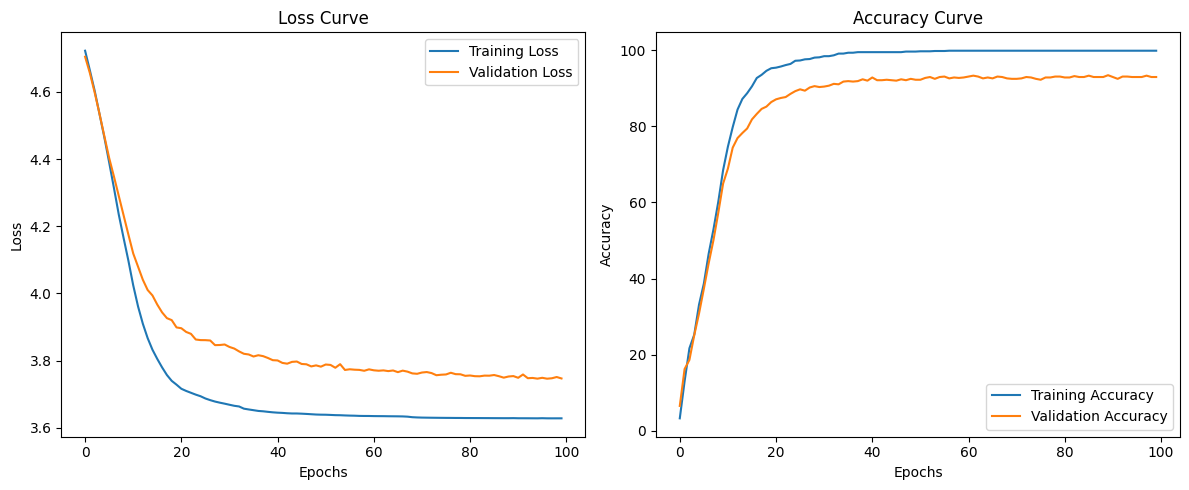

In [29]:
train_and_plot(model_left, train_left_dataloader, val_left_dataloader)

EPOCH 1:
Training: 
 Training Accuracy: 3.09%, Average Training Loss: 4.8344
Validation: 
 Validation Accuracy: 4.43%, Average Validation Loss: 4.6929
EPOCH 2:
Training: 
 Training Accuracy: 5.88%, Average Training Loss: 4.7030
Validation: 
 Validation Accuracy: 6.94%, Average Validation Loss: 4.9714
EPOCH 3:
Training: 
 Training Accuracy: 9.50%, Average Training Loss: 4.6394
Validation: 
 Validation Accuracy: 10.53%, Average Validation Loss: 4.6142
EPOCH 4:
Training: 
 Training Accuracy: 12.67%, Average Training Loss: 4.5981
Validation: 
 Validation Accuracy: 12.68%, Average Validation Loss: 4.9026
EPOCH 5:
Training: 
 Training Accuracy: 15.08%, Average Training Loss: 4.5560
Validation: 
 Validation Accuracy: 15.31%, Average Validation Loss: 4.5838
EPOCH 6:
Training: 
 Training Accuracy: 22.70%, Average Training Loss: 4.5023
Validation: 
 Validation Accuracy: 22.01%, Average Validation Loss: 4.5324
EPOCH 7:
Training: 
 Training Accuracy: 29.41%, Average Training Loss: 4.4406
Validatio

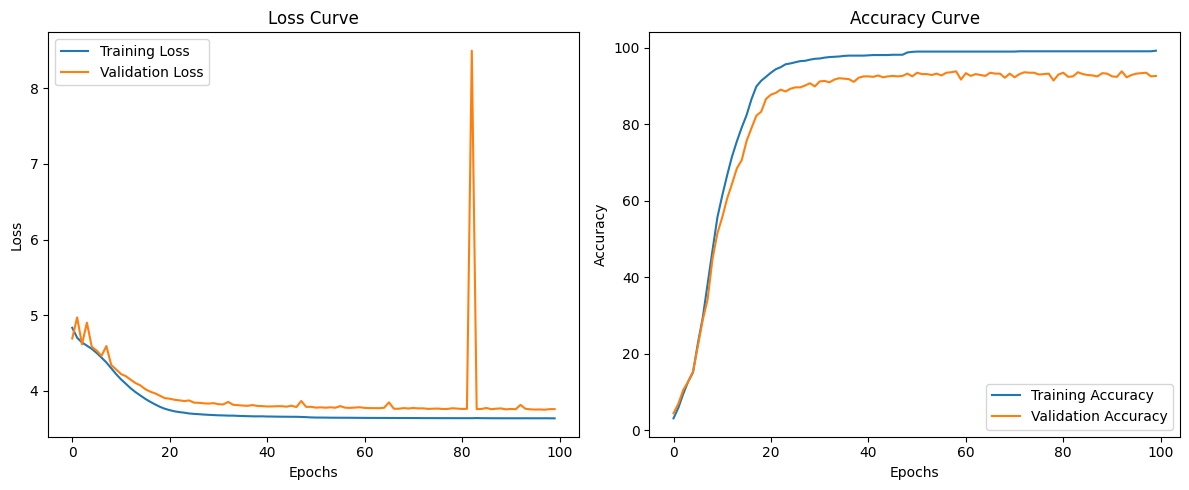

In [30]:
train_and_plot(model_right, train_right_dataloader, val_right_dataloader)

EPOCH 1:
Training: 
 Training Accuracy: 3.17%, Average Training Loss: 4.8358
Validation: 
 Validation Accuracy: 7.06%, Average Validation Loss: 4.7577
EPOCH 2:
Training: 
 Training Accuracy: 7.61%, Average Training Loss: 4.6978
Validation: 
 Validation Accuracy: 6.82%, Average Validation Loss: 4.6511
EPOCH 3:
Training: 
 Training Accuracy: 11.23%, Average Training Loss: 4.6082
Validation: 
 Validation Accuracy: 11.72%, Average Validation Loss: 4.5811
EPOCH 4:
Training: 
 Training Accuracy: 17.53%, Average Training Loss: 4.5263
Validation: 
 Validation Accuracy: 18.84%, Average Validation Loss: 4.5143
EPOCH 5:
Training: 
 Training Accuracy: 25.22%, Average Training Loss: 4.4494
Validation: 
 Validation Accuracy: 24.58%, Average Validation Loss: 4.4548
EPOCH 6:
Training: 
 Training Accuracy: 30.72%, Average Training Loss: 4.3878
Validation: 
 Validation Accuracy: 29.84%, Average Validation Loss: 4.4134
EPOCH 7:
Training: 
 Training Accuracy: 38.75%, Average Training Loss: 4.3212
Validati

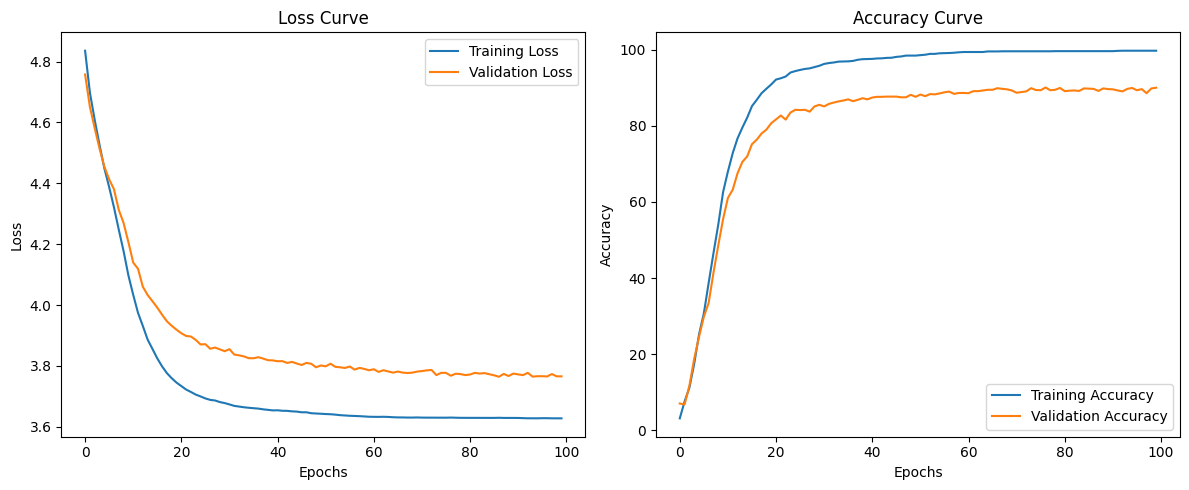

In [31]:
model_fused
train_and_plot(model_fused, train_combined_dataloader, val_combined_dataloader)

In [32]:
def predict_images(model, test_loader, device, num_images=10):
    model.eval()
    images, labels = next(iter(test_loader))
    images, labels = images.to(device), labels.to(device)
    outputs, _ = model(images)
    _, predicted = torch.max(outputs.data, 1)
    
    return images[:num_images], predicted[:num_images], labels[:num_images]

def plot_images(images, predictions, labels, classes, num_per_row=5):
    num_images = len(images)
    num_rows = (num_images + num_per_row - 1) // num_per_row
    fig, axes = plt.subplots(num_rows, num_per_row, figsize=(15, 3 * num_rows))
    
    for idx in range(num_images):
        img = images[idx].cpu().numpy().transpose(1, 2, 0)
        ax = axes[idx // num_per_row, idx % num_per_row]
        ax.imshow(img.squeeze(), cmap='gray')
        ax.set_title(f'Pred: {classes[predictions[idx].item()]}\nLabel: {classes[labels[idx].item()]}')
        ax.axis('off')
    
    for idx in range(num_images, num_rows * num_per_row):
        axes[idx // num_per_row, idx % num_per_row].axis('off')
    
    plt.show()

Right Ear Model Predictions


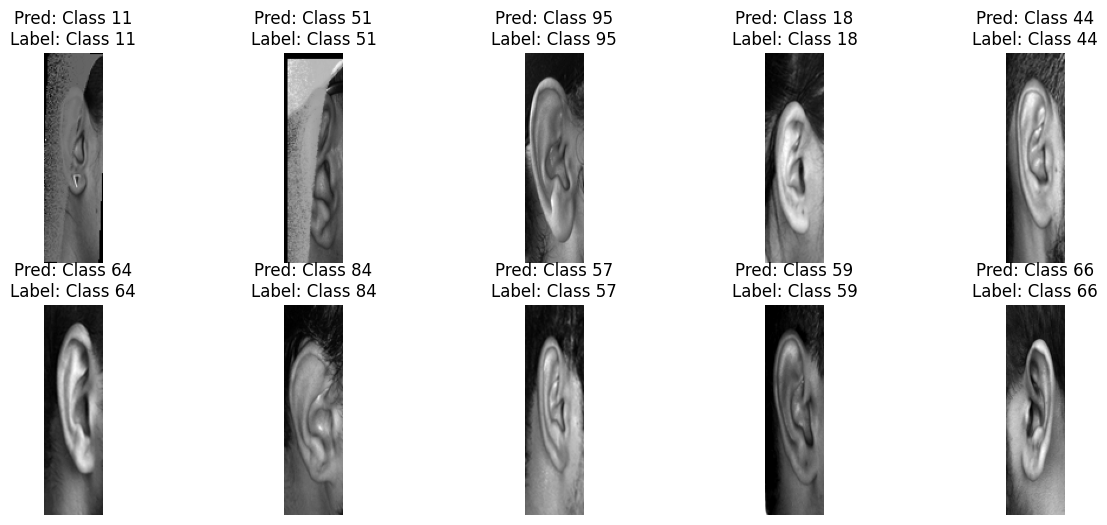

In [51]:
 
classes = [f'Class {i}' for i in range(100)]  # Adjust this according to your classes

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Predict and plot images for each model
images_left, preds_left, labels_left = predict_images(model_left, test_loader_left, device, num_images=10)
images_right, preds_right, labels_right = predict_images(model_right, test_loader_right, device, num_images=10)
images_fused, preds_fused, labels_fused = predict_images(model_fused, test_loader_fused, device, num_images=10)

print("Right Ear Model Predictions")
plot_images(images_right, preds_right, labels_right, classes)

In [34]:
from sklearn.metrics import roc_curve, precision_recall_curve, roc_auc_score, average_precision_score
from scipy.optimize import brentq
def evaluate_model(model, test_loader,train_loader, num_classes, max_rank=5):
    model.eval()
    
    closed_cmc_right = np.zeros((len(test_loader.dataset), max_rank))
    closed_fpr_right = [[] for _ in range(num_classes)]
    closed_tpr_right = [[] for _ in range(num_classes)]
    closed_precision_right = [[] for _ in range(num_classes)]
    closed_recall_right = [[] for _ in range(num_classes)]
    closed_auroc_right = []
    closed_aupr_right = []
    closed_eer_right = []

    all_labels = []
    all_probs = []

    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model.to(device)

    with torch.no_grad():
        for data, labels in test_loader:
            data, labels = data.to(device), labels.to(device)
            outputs = model(data)
            
            # Check if outputs is a tuple and get the first element if it is
            if isinstance(outputs, tuple):
                outputs = outputs[0]
            
            probs = torch.softmax(outputs, dim=1)
            
            all_labels.extend(labels.cpu().numpy())
            all_probs.extend(probs.cpu().numpy())
    
    # Convert to numpy arrays
    all_labels = np.array(all_labels)
    all_probs = np.array(all_probs)
    
    # Calculate metrics for each class
    for i in range(num_classes):
        if np.sum(all_labels == i) == 0:
            print(f"No positive samples for class {i} in the test set.")
            continue
        
        try:
            fpr, tpr, _ = roc_curve(all_labels == i, all_probs[:, i])
            precision, recall, _ = precision_recall_curve(all_labels == i, all_probs[:, i])
            auroc = roc_auc_score(all_labels == i, all_probs[:, i])
            aupr = average_precision_score(all_labels == i, all_probs[:, i])
            eer = brentq(lambda x : 1. - x - interp1d(fpr,tpr)(x), 0., 1.)
        except ValueError as e:
            print(f"Error calculating metrics for class {i}: {e}")
            continue

        closed_fpr_right[i] = fpr
        closed_tpr_right[i] = tpr
        closed_precision_right[i] = precision
        closed_recall_right[i] = recall
        closed_auroc_right.append(auroc)
        closed_aupr_right.append(aupr)
        closed_eer_right.append(eer)
        
        def calculate_cmc(probabilities, labels, top_k=5):
            num_samples = labels.shape[0]
            correct_at_k = np.zeros((top_k, 2))  # Initialize a 2D array to store mean and std
    
            for k in range(1, top_k + 1):
                top_k_predictions = np.argsort(probabilities, axis=1)[:, -k:]
#                 accuracies = np.array([1 if label in top_k_pred else 0 for label, top_k_pred in zip(labels, top_k_predictions)])
                correct_at_k[k - 1][0] = np.mean([1 if label in top_k_pred else 0 for label, top_k_pred in zip(labels, top_k_predictions)])
                correct_at_k[k - 1][1] = np.std([1 if label in top_k_pred else 0 for label, top_k_pred in zip(labels, top_k_predictions)])
                
    
            return correct_at_k
  
        closed_cmc_right=calculate_cmc(all_probs, all_labels, top_k=5)
    
    
    return (closed_cmc_right, closed_fpr_right, closed_tpr_right, 
            closed_precision_right, closed_recall_right, 
            closed_auroc_right, closed_aupr_right, closed_eer_right)


In [35]:
def calculate_accuracy(model, test_loader, device):
    model.eval()
    correct = 0
    total = 0
    
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs, _ = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    accuracy = 100 * correct / total
    return accuracy

In [36]:
calculate_accuracy(model_right,test_loader_right,device)

93.04932735426009

In [37]:
calculate_accuracy(model_fused,test_loader_fused,device)

90.91588785046729

In [38]:
calculate_accuracy(model_left, test_loader_left,device)

92.82511210762331

In [39]:
num_classes=100
scores_right = evaluate_model(model_right, test_loader_right,train_right_dataloader, num_classes)
scores_left = evaluate_model(model_left, test_loader_left,train_left_dataloader, num_classes)
scores_fused = evaluate_model(model_fused, test_loader_fused,train_combined_dataloader, num_classes)

# Unpack the scores
(closed_cmc_right, closed_fpr_right, closed_tpr_right, 
 closed_precision_right, closed_recall_right, 
 closed_auroc_right, closed_aupr_right, closed_eer_right) = scores_right

(closed_cmc_left, closed_fpr_left, closed_tpr_left, 
 closed_precision_left, closed_recall_left, 
 closed_auroc_left, closed_aupr_left, closed_eer_left) = scores_left

(closed_cmc_fused, closed_fpr_fused, closed_tpr_fused, 
 closed_precision_fused, closed_recall_fused, 
 closed_auroc_fused, closed_aupr_fused, closed_eer_fused) = scores_fused




/opt/conda/lib/python3.10/site-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/opt/conda/lib/python3.10/site-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


In [40]:
import numpy as np

def calculate_metrics(ear_side, closed_cmc_right, closed_fpr_right, closed_tpr_right, 
                      closed_precision_right, closed_recall_right, 
                      closed_auroc_right, closed_aupr_right, closed_eer_right, 
                      num_decimals=2, print_metrics=True):
    
    # Convert to numpy arrays and multiply by 100
    cmc = 100 * np.array(closed_cmc_right)
    auroc = 100 * np.array(closed_auroc_right)
    aupr = 100 * np.array(closed_aupr_right)
    eer = 100 * np.array(closed_eer_right)
    
    # Calculate mean and standard deviation
    auroc_mean = np.around(np.mean(auroc), num_decimals)
    auroc_sd = np.around(np.std(auroc), num_decimals)
    
    aupr_mean = np.around(np.mean(aupr), num_decimals)
    aupr_sd = np.around(np.std(aupr), num_decimals)
    
    eer_mean = np.around(np.mean(eer), num_decimals)
    eer_sd = np.around(np.std(eer), num_decimals)
    
    r1_mean = np.around(cmc[1][0],num_decimals); r1_sd = np.around(cmc[1][1],num_decimals); 
    r5_mean = np.around(cmc[4][0],num_decimals); r5_sd = np.around(cmc[4][1],num_decimals);
    
    if print_metrics:
        print("Mean and SD of AUROC score is ",ear_side," :", auroc_mean, ", ", auroc_sd)
        print("Mean and SD of AUPR score is: ",ear_side," :", aupr_mean, ", ", aupr_sd)
        print("Mean and SD of equal error rate is: ",ear_side," :", eer_mean, ", ", eer_sd)
        print("Mean and SD of Rank-1 accuracy is: ",ear_side," :", r1_mean, ", ", r1_sd)
        print("Mean and SD of Rank-5 accuracy is: ",ear_side," :", r5_mean, ", ", r5_sd)
    
    return {
        'ear_side': ear_side,
        'auroc_mean': auroc_mean,
        'auroc_sd': auroc_sd,
        'aupr_mean': aupr_mean,
        'aupr_sd': aupr_sd,
        'eer_mean': eer_mean,
        'eer_sd': eer_sd,
        'r1_mean': r1_mean,
        'r1_sd': r1_sd,
        'r5_mean': r5_mean,
        'r5_sd': r5_sd,
        'fpr': closed_fpr_right
    }

In [41]:
result_r = calculate_metrics("Right",closed_cmc_right, closed_fpr_right, closed_tpr_right, 
                             closed_precision_right, closed_recall_right, 
                             closed_auroc_right, closed_aupr_right, closed_eer_right)


result_l = calculate_metrics("Left",closed_cmc_left, closed_fpr_left, closed_tpr_left, 
                                  closed_precision_left, closed_recall_left, 
                                 closed_auroc_left, closed_aupr_left, closed_eer_left)

result_f = calculate_metrics("Fused",closed_cmc_fused, closed_fpr_fused, closed_tpr_fused, 
                                   closed_precision_fused, closed_recall_fused, 
                                   closed_auroc_fused, closed_aupr_fused, closed_eer_fused)


Mean and SD of AUROC score is  Right  : 99.9 ,  0.42
Mean and SD of AUPR score is:  Right  : 98.03 ,  4.29
Mean and SD of equal error rate is:  Right  : 0.65 ,  2.04
Mean and SD of Rank-1 accuracy is:  Right  : 95.89 ,  19.85
Mean and SD of Rank-5 accuracy is:  Right  : 97.76 ,  14.8
Mean and SD of AUROC score is  Left  : 99.88 ,  0.44
Mean and SD of AUPR score is:  Left  : 97.21 ,  4.99
Mean and SD of equal error rate is:  Left  : 0.8 ,  1.83
Mean and SD of Rank-1 accuracy is:  Left  : 94.99 ,  21.81
Mean and SD of Rank-5 accuracy is:  Left  : 97.53 ,  15.51
Mean and SD of AUROC score is  Fused  : 99.77 ,  0.92
Mean and SD of AUPR score is:  Fused  : 96.05 ,  4.8
Mean and SD of equal error rate is:  Fused  : 1.53 ,  2.19
Mean and SD of Rank-1 accuracy is:  Fused  : 93.76 ,  24.19
Mean and SD of Rank-5 accuracy is:  Fused  : 96.37 ,  18.69


In [42]:
def return_combined_plot_curves(fpr_side,tpr_side,recall_side,precision_side):

    # for ROC curves 
    num_trials = len(fpr_side)
    max_points = len(fpr_side[0])
    max_trial_num = 0

    for trial_index in range(num_trials):
        if max_points > len(fpr_side[trial_index]):
            max_points = len(fpr_side[trial_index]); max_trial_num = trial_index;      

    fpr = np.array(fpr_side[max_trial_num])
    all_tpr = np.zeros((num_trials,max_points))
    auroc_side = np.zeros(num_trials)

    for trial_index in range(num_trials):
        f_interpolate = interp1d(np.array(fpr_side[trial_index]),np.array(tpr_side[trial_index]),kind='linear')
        all_tpr[trial_index,:] = f_interpolate(np.array(fpr_side[max_trial_num]))   
        
        auroc_side[trial_index] = sklearn_metrics.auc(fpr,all_tpr[trial_index,:])   

    all_tpr_mean = np.mean(all_tpr,0); all_tpr_std = np.std(all_tpr,0); 


    # for PR curves
    num_trials = len(recall_side)
    max_points = len(recall_side[0])
    max_trial_num = 0

    for trial_index in range(num_trials):
        if max_points > len(recall_side[trial_index]):
            max_points = len(recall_side[trial_index]); max_trial_num = trial_index;      

    recall = np.array(recall_side[max_trial_num])
    all_precision = np.zeros((num_trials,max_points))
    aupr_side = np.zeros(num_trials)

    for trial_index in range(num_trials):
        f_interpolate = interp1d(np.array(recall_side[trial_index]),np.array(precision_side[trial_index]),kind='linear')
        all_precision[trial_index,:] = f_interpolate(np.array(recall_side[max_trial_num]))   
        
        aupr_side[trial_index] = sklearn_metrics.auc(recall,all_precision[trial_index,:])     

    all_precision_mean = np.mean(all_precision,0); all_precision_std = np.std(all_precision,0); 

    return fpr, all_tpr_mean, all_tpr_std, recall, all_precision_mean, all_precision_std

In [43]:
fpr_r,all_tpr_mean_r,all_tpr_std_r,recall_r,all_precision_mean_r,all_precision_std_r = return_combined_plot_curves(closed_fpr_right, closed_tpr_right,  closed_recall_right,closed_precision_right )
fpr_l,all_tpr_mean_l,all_tpr_std_l,recall_l,all_precision_mean_l,all_precision_std_l = return_combined_plot_curves(closed_fpr_left, closed_tpr_left,  closed_recall_left,closed_precision_left )
fpr_f,all_tpr_mean_f,all_tpr_std_f,recall_f,all_precision_mean_f,all_precision_std_f = return_combined_plot_curves(closed_fpr_fused, closed_tpr_fused,  closed_recall_fused,closed_precision_fused )


In [44]:
def plot_combined_curves(fpr_r,all_tpr_mean_r,all_tpr_std_r,recall_r,all_precision_mean_r,all_precision_std_r,col_r,
                         fpr_l,all_tpr_mean_l,all_tpr_std_l,recall_l,all_precision_mean_l,all_precision_std_l,col_l,
                         fpr_f,all_tpr_mean_f,all_tpr_std_f,recall_f,all_precision_mean_f,all_precision_std_f,col_f):
    width = 2;
    plt.subplot(1,3,1)

    plt.plot(fpr_r,all_tpr_mean_r,c=col_r);
    plt.fill_between(fpr_r,all_tpr_mean_r-width*all_tpr_std_r,all_tpr_mean_r+width*all_tpr_std_r,facecolor=col_r,alpha=0.2)

    plt.plot(fpr_l,all_tpr_mean_l,c=col_l);
    plt.fill_between(fpr_l,all_tpr_mean_l-width*all_tpr_std_l,all_tpr_mean_l+width*all_tpr_std_l,facecolor=col_l,alpha=0.2)

    plt.plot(fpr_f,all_tpr_mean_f,c=col_f);
    plt.fill_between(fpr_f,all_tpr_mean_f-width*all_tpr_std_f,all_tpr_mean_f+width*all_tpr_std_f,facecolor=col_f,alpha=0.2)
    
    plt.legend(["Right Mean","Left Mean","Fused Mean","Right SD","Left SD","Fused SD"],loc = "lower right")
    plt.title("ROC Curve",fontsize=20); plt.xlabel("FPR",fontsize=15); plt.ylabel("TPR",fontsize=15); 
    plt.grid(color = 'aqua', linestyle = 'dashdot', linewidth = 0.5);
    plt.yticks(np.arange(0,1.01,0.1));plt.xticks(np.arange(0,1.01,0.1));

    plt.subplot(1,3,2)

    plt.plot(recall_r,all_precision_mean_r,c=col_r);
    plt.fill_between(recall_r,all_precision_mean_r-width*all_precision_std_r,all_precision_mean_r+width*all_precision_std_r,facecolor=col_r,alpha=0.2)
    
    plt.plot(recall_l,all_precision_mean_l,c=col_l);
    plt.fill_between(recall_l,all_precision_mean_l-width*all_precision_std_l,all_precision_mean_l+width*all_precision_std_l,facecolor=col_l,alpha=0.2)

    plt.plot(recall_f,all_precision_mean_f,c=col_f);
    plt.fill_between(recall_f,all_precision_mean_f-width*all_precision_std_f,all_precision_mean_f+width*all_precision_std_f,facecolor=col_f,alpha=0.2)    
    
    plt.legend(["Right Mean","Left Mean","Fused Mean","Right SD","Left SD","Fused SD"],loc = "lower left")
    plt.title("Precision Recall Curve",fontsize=20); plt.xlabel("Recall",fontsize=15); plt.ylabel("Precision",fontsize=15); 
    plt.grid(color = 'aqua', linestyle = 'dashdot', linewidth = 0.5);
    plt.yticks(np.arange(0,1.01,0.1));plt.xticks(np.arange(0,1.01,0.1));


 

In [ ]:
plt.figure(figsize = (27,8))
plot_combined_curves(fpr_r,all_tpr_mean_r,all_tpr_std_r,recall_r,all_precision_mean_r,all_precision_std_r,'b',
                         fpr_l,all_tpr_mean_l,all_tpr_std_l,recall_l,all_precision_mean_l,all_precision_std_l,'g',
                         fpr_f,all_tpr_mean_f,all_tpr_std_f,recall_f,all_precision_mean_f,all_precision_std_f,'r')

plt.savefig("L0_closed_no_occlusions.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [46]:
import torch
import numpy as np

def evaluate_model(model, test_loader, device):
    model.to(device)
    model.eval()
    scores = []
    gt_labels = []

    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            if isinstance(output, tuple):
                output = output[0]
            probs = torch.softmax(output, dim=1)
            scores.extend(probs.cpu().numpy())
            gt_labels.extend(target.cpu().numpy())

    return np.array(scores), np.array(gt_labels)



In [47]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc

def get_metric_curves_from_scores(scores, gt_labels, num_classes):
    fpr = {}
    tpr = {}
    precision = {}
    recall = {}
    auroc = {}
    aupr = {}
    eer = {}

    for i in range(num_classes):
        # Calculate ROC curve
        fpr[i], tpr[i], _ = roc_curve(gt_labels == i, scores[:, i])
        # Calculate Precision-Recall curve
        precision[i], recall[i], _ = precision_recall_curve(gt_labels == i, scores[:, i])
        # Calculate AUROC
        auroc[i] = auc(fpr[i], tpr[i])
        # Calculate AUPR
        aupr[i] = auc(recall[i], precision[i])
        # Calculate EER
        eer[i] = fpr[i][np.nanargmin(np.abs(fpr[i] - (1 - tpr[i])))]
    
    return fpr, tpr, precision, recall, auroc, aupr, eer
